# Predicción de Costos de Casas

Ahora que tenemos herramientas, es hora de implementar un modelo y evaluarlo. En este proyecto, crearemos predicciones de los costos de las casas de los suburbios de Boston. La idea es crear un modelo que pueda predecir el precio de casas. Veremos qué tan valioso podría ser esto para alguien que vende casas que podría utilizas esa información diariamente.

Este dataset surge del UCI Machine Learning Repository con información juntada en 1978 utilizando 14 features de casas de diferentes zonas. La información ha sido preprocesada de la siguiente manera:
* 16 casas tenían un MEDV de 50. Lo más seguro es que faltaban valores y fueron eliminaos.
* 1 punto tenía un RM de 8.78. Este fue un outlier y por lo tanto fue eliminado.
* Los únicos features esenciales que nos interesan por ahora son 'RM', 'LSTAT', 'PTRATIO' y 'MEDV'. Los demas features fueron eliminados
* El valor 'MEDV' fue escalado a 35 años de inflación.

Ahora explicamos los features

In [58]:
# Importamos librerías
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Visualizaciones implementadas en visuals.py
import visuals as vs

%matplotlib inline

# Cargamos dataset y separamos features del label
data = pd.read_csv('data/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Exploración

En la primera sección del proyecto vamos a investigar la información y darás observaciones de esta. Una práctica fundamental es familiarizarte con la información mediante un proceso explorativo. Los resultados deben estar justificados y no lo podemos hacer con esto.

In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

### Calculamos estadísticas

**TODO** Ahora implementarás código para calcular estadísticas descriptivas de los precios de las casas. NumPy ya ha sido importado, así que lo utilizaremos para hacer estos cálculos. Este paso es importante cuando analicemos los resultados del modelo.

Calcula el mínimo, máximo, promedio, mediana y desviación estandar de 'MEDV', el feature que quieres predecir.

In [59]:
# Recuerda usar np

# TODO: Precio mínimo
minimum_price = np.min(prices)

# TODO: Precio máximo
maximum_price = np.max(prices)

# TODO: Promedio
mean_price = np.mean(prices)

# TODO: Mediana
median_price = np.median(prices)

# TODO: Desviación estandar
std_price = np.std(prices)

# Muestra estadística
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Pregunta 1 - Observación de features

Estamos utlizando 3 features del dataset. Para cada casa:
* 'RM' es el promedio de cuartos en las casas del barrio
* 'LSTAT' es el porcentaje de trabajadores que se consideran de clase baja.
* 'PTRATIO' es el ratio de estudiantes a profesores en primaria y secundaria

Usando tu intuición, para cada uno de los features, ¿un incremento en su valor llevaría a un aumento en el valor de 'MEDV' o lo contrario? Justifica tu respuesta para cada uno. Este problema se puede plantear como:¿Esperarías que una casa con 'RM' de 6 valga más o menos que una de 'RM' de 7?

**Respuesta**

## Desarrollo del modelo

En esta sección, vas a desarrollar las técnicas para que el modelo haga una buena predicción. Evaluar el desempeño de un modelo no es una tarea sencilla, y es algo esencial para tener confianza en el modelo que desarrolles.

### Definir métrica de desempeño

Hay diferentes métricas para evaluar un modelo. Lo primero es identificar el tipo de problema que es. Siendo un problema de regresión, podemos usar Mean Squared Error, Mean Squared Log Error, R2 Score y otros. Para este proyecto, utilizaremos R2, el coeficiente de determinación, para calcular el desempeño. Es una estadística útil para análisis de regresión y describe qué tan bueno el modelo es haciendo las predicciones. Los valores de R2 van de 0 a 1, que es el porcentaje de la correlación entre valores predecidos y verdaderos al cuadrado. Un modelo de R2 de 0 no es mejor que un modelo que siempre predice el promedio del objetivo, mientras que un modelo con R2 de 1 predice perfectamente la variable objetivo. Si un modelo tiene un valor negativo para R2, significa que el modelo es peor que uno que siempre predice el promedio.

En la función ```performance_metric``` en la siguiente celda deberás implementar
* Utiliza ```r2_score``` de ```sklearn.metrics``` para hacer el cálculo de desempeño entre y_true y y_predict.
* Asigna el valor a la variable score.

In [60]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Pregunta 2

Asume que un dataset contiene 5 puntos y que el modelo hizo las siguientes predicciones:


| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Corre la siguiente celda para calcular el coeficiente de determinación del modelo.

In [61]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


¿Consideras que este modelo ha capturado la variación del target exitosamente o no? ¿Por qué?

Hint
- R2 de 0 significa que la variable dependiente no puede ser predecida de la independiente.
- R2 de 1 significa que si puede.
- Un R2 de 0.40 significa que 40% de la varianza en Y es predecible de X.

**Respuesta**

### Barajar y separar data

Ahora, la siguiente tarea es separar en training y testing. Normalmente, la información se baraja aleatoriamente en este paso para quitar cualquier bias de tener el dataset ordenado.

En la siguiente celda, implementa lo siguiente
* Usa `train_test_split` de `sklearn.cross_validation` para barajar y separar `features` y `prices` en training y testing.
    - Separa la información con 80% en training.

In [62]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2) 

print("Training and testing split was successful.")

Training and testing split was successful.


### Pregunta 3
¿Cuál es el beneficio de separar un dataset en testing y training para un algoritmo de aprendizaje?

**Respuesta**

## Analizando Desempeño
En esta tercera sección, mirarás el desempeño de diferentes modelos en varios pedazos de training data. Adicionalmente, mirarás un algoritmo particular que tiene un parámetros `max_depth` para ver cómo la complejidad del modelo afecta su desempeño. Graficar el desempeño del modelo en varios criterios puede beneficiar el proceso de analizar tu modelo.

### Curvas de Aprendizaje
La siguiente celda produce cuatro gráficas para un árbol de decisiones con diferente profundidad. Cada gráfica visualiza las curvas de curva de aprendizaje tanto en la información de entrenamiento y de testing mientras se van dando más ejemplos. La zona sombreada es la incertidumbre de la curva medida con la desviación estandar. El score se calcula con R2.

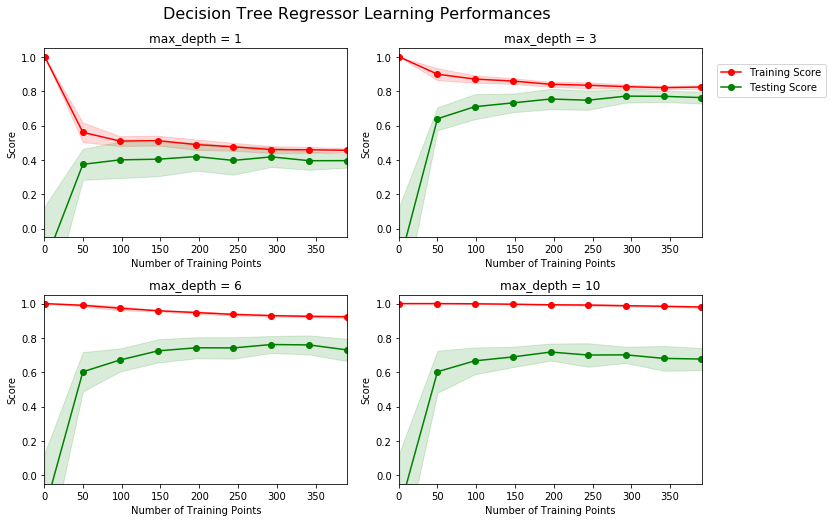

In [63]:
vs.ModelLearning(features, prices)

### Pregunta 4
* Elige uno de las gráficas de arriba y di cuál es su profundidad máxima
* ¿Qué pasa con la curva de entrenamiento y con la curva de testing cuando se dan más ejemplos?
* ¿Ayudaría si hubieran más puntos de entrenamiento?

**Hint:** ¿Las curvas convergen en algún score particular?

**Respuesta**

### Curvas de complejidad

La siguiente celda produce una gráfica para un modelo de árbol de decisión que ha sido entrenado y validado con la información de entrenamiento con diferentes profundidades. Una curva es entrenamiento y otra es validación. Se utiliza `performance_metric` para medir el score.

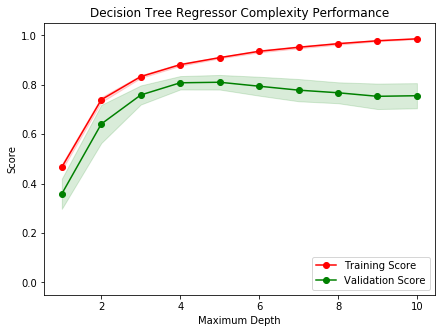

In [64]:
vs.ModelComplexity(X_train, y_train)

### Pregunta 5
* Cuando el modelo tiene un maximum depth de 1, ¿el modelo sufre de bias o de variance?
* ¿Y Cuando el modelo tiene un maximum depth de 10?
* ¿Qué pistas visuales en la gráfica soportan tu conclusión?

**Respuesta**

### Pregunta 6
* ¿Cuál depth generaliza mejor para información que no ha visto?
* ¿Cuál es tu intuición para esta respuesta?

**Respuesta**

## Evaluando desempeño
Es hora de construir un modelo y optimizarlo.

### Pregunta 7
* ¿Qué es Grid Search?
* ¿Cómo se aplica para optimizar un algoritmo de aprendizaje?
* ¿Cuál es el fin de este método?
* ¿Puedes dar un ejemplo?

**Respuesta**

### Implementación del modelo

Vamos a combinar todo lo que hemos visto para construir y entrenar un modelo que usa un **árbol de decisiones**. Para asegurarnos que el modelo está optimizado, utilizaremos una técnica llamada grid search para optimizar el `max_depth` del árobl de decisiones. Este parámetro puede ser pensado como cuántas preguntas debe hacer el algoritmo para hacer una predicción. 

Adicionalmente, utilizarás `ShuffleSplit()`como una alternativa de cross-validation. Esa parte ya está implementada. Esta creará `n_splits` conjuntos barajeados, y, para cada uno, 20% de la información será usada como set de validación. 

Necesitarás implementar lo siguiente
- Utiliza [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) de `sklearn.tree` para crear el clasificador.
- Crea un diccionario para `max_depth` donde los valores vayan de 1 a 10.
- Crea un objeto de scoring [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) de `sklearn.metrics`
    - Envía `performance_metric` como parámetro
- Usa [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` para crear el objeto de Grid Search

In [65]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Pregunta 9

* Corre la siguiente celda para ver conseguir el modelo óptimo
* ¿Cuál es la profundidad óptima para el modelo? ¿Cómo se compara con tu respuesta de la pregunta 6?

In [66]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


**Respuesta**

### Pregunta 10 

Imagina que un agente quiere usar el modelo para ayudar a sus clientes diciendo a qué precio deberían vender. Tiene la siguiente info de sus clientes:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


* ¿A qué precio recomendarías vender la casa a cada cliente?
* ¿Estos precios son razonables para los features?

**Hint** Para la segunda pregunta, usa las estadísticas calculadas al inicio. 

In [67]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $437,266.67
Predicted selling price for Client 2's home: $231,793.33
Predicted selling price for Client 3's home: $854,700.00


### Sensitividad
Un modelo óptimo no es, necesariamente, un modelo robusto. A veces, un modelo puede ser muy complejo o simple. A veces, el algoritmo de aprendizaje no es el apropiado. Otras veces, la información puede tener mucho ruido o tener pocos ejemplos para que un modelo aprenda.

Corre la siguiente celda para correr `fit_model` 10 veces con diferentes conjuntos para ver si cambian las predicciones para los clientes.

In [68]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Pregunta 11

* En unas oraciones, explica porque el modelo construido debería ser utilizado o no en la vida real.

**Hint** Mira los rangos de precios calculados. Algunas buenas preguntas son:
    - ¿Qué tan relevante es la info de 1978? ¿Qué tan importante es la inflación?
    - ¿Los features que usamos son suficienes para predecir el precio de una casa?
    - ¿El modelo es robusto para hacer predicciones consistentes?
    - ¿Lo recolectado en una ciudad urbana aplicaría en una ciudad rural?
    - ¿Es justo decidir el precio de una casa individual a partir de las características del barrio?